In [33]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import Image

In [5]:
covid = pd.read_csv("caso_full.csv.gz", index_col="date", parse_dates=True)

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3853648 entries, 2020-03-17 to 2022-03-27
Data columns (total 17 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   epidemiological_week                           int64  
 3   estimated_population                           float64
 4   estimated_population_2019                      float64
 5   is_last                                        bool   
 6   is_repeated                                    bool   
 7   last_available_confirmed                       int64  
 8   last_available_confirmed_per_100k_inhabitants  float64
 9   last_available_date                            object 
 10  last_available_death_rate                      float64
 11  last_available_deaths                          int64  
 12  order_for_place            

# Descriptive statistics


In [7]:
covid.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3.840002e+06,3.853648e+06,3.840002e+06,3.840002e+06,3.853648e+06,3.824482e+06,3.853648e+06,3.853648e+06,3.853648e+06,3.853648e+06,3.853648e+06
mean,3.228321e+06,2.021052e+05,8.116488e+04,8.054619e+04,4.777532e+03,5.984968e+03,2.650386e-02,1.296616e+02,3.442507e+02,1.385716e+01,3.307339e-01
std,1.009499e+06,5.755437e+01,9.057809e+05,8.992380e+05,6.180363e+04,5.358505e+03,4.975375e-02,1.901344e+03,1.992017e+02,2.606627e+02,6.263980e+00
min,1.100000e+01,2.020090e+05,7.760000e+02,7.810000e+02,0.000000e+00,2.160000e-03,0.000000e+00,0.000000e+00,1.000000e+00,-5.942900e+04,-4.070000e+02
25%,2.509107e+06,2.020440e+05,5.602000e+03,5.603000e+03,1.420000e+02,1.571626e+03,1.140000e-02,3.000000e+00,1.720000e+02,0.000000e+00,0.000000e+00
50%,3.144508e+06,2.021160e+05,1.219500e+04,1.213900e+04,4.800000e+02,4.675325e+03,1.970000e-02,9.000000e+00,3.440000e+02,0.000000e+00,0.000000e+00
75%,4.117297e+06,2.021400e+05,2.689900e+04,2.670000e+04,1.395000e+03,9.208211e+03,2.990000e-02,3.000000e+01,5.150000e+02,2.000000e+00,0.000000e+00
max,5.300108e+06,2.022130e+05,4.628933e+07,4.591905e+07,5.232374e+06,9.048099e+05,1.000000e+00,1.671100e+05,7.620000e+02,1.052000e+05,1.389000e+03


In [8]:
covid.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [9]:
covid_states = covid[covid["place_type"] == "state"]
covid_states.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,NaN,12.0,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0,0,3,state,AC,1,0
2020-03-20,NaN,12.0,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0,0,4,state,AC,3,0
2020-03-21,NaN,12.0,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0


In [10]:
total_cases = covid_states.new_confirmed.sum()
total_deaths = covid.new_deaths.sum()
print("{} casos confirmados ate o dia {}".format(total_cases, covid_states.index[-1]))
print("{} obitos confirmados ate o dia {}".format(total_deaths, covid_states.index[-1]))

29849740 casos confirmados ate o dia 2022-03-27 00:00:00
1274532 obitos confirmados ate o dia 2022-03-27 00:00:00


# Confirmed Cases by States 

In [11]:
cases_by_states = covid_states.groupby("state")["new_confirmed"].sum()
cases_by_states = cases_by_states.sort_values(ascending=False)
cases_by_states = pd.DataFrame(cases_by_states)
cases_by_states

,new_confirmed
state,
SP,5232374
MG,3317401
PR,2407960
RS,2263880
RJ,2078817
SC,1671175
BA,1530054
GO,1269853
CE,1239746


# Confirmed Deaths by States

In [12]:
deaths_by_states = covid_states.groupby("state")["new_deaths"].sum()
deaths_by_states = deaths_by_states.sort_values(ascending=False)
deaths_by_states = pd.DataFrame(deaths_by_states)
deaths_by_states

,new_deaths
state,
SP,167110
RJ,72695
MG,60767
PR,42896
RS,38985
BA,29658
CE,26708
GO,26212
SC,21648


# Daily Evolution

In [13]:
daily_evolution = covid_states.groupby(covid_states.index)[["new_confirmed", "new_deaths"]].sum()
daily_evolution

,new_confirmed,new_deaths
date,,
2020-02-25,1,0
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
...,...,...
2022-03-23,46255,283
2022-03-24,37290,308
2022-03-25,34009,257


In [14]:
daily_evolution["moving_average_cases"] = daily_evolution.new_confirmed.rolling(window=8).mean()
daily_evolution["moving_average_deaths"] = daily_evolution.new_deaths.rolling(window=8).mean()
daily_evolution = daily_evolution.fillna(value=0)
daily_evolution.tail()

,new_confirmed,new_deaths,moving_average_cases,moving_average_deaths
date,,,,
2022-03-23,46255,283,37055.250,300.25
2022-03-24,37290,308,35393.625,294.25
2022-03-25,34009,257,33951.500,266.75
2022-03-26,28673,192,31538.500,243.00
2022-03-27,10311,109,28053.375,221.00


# 

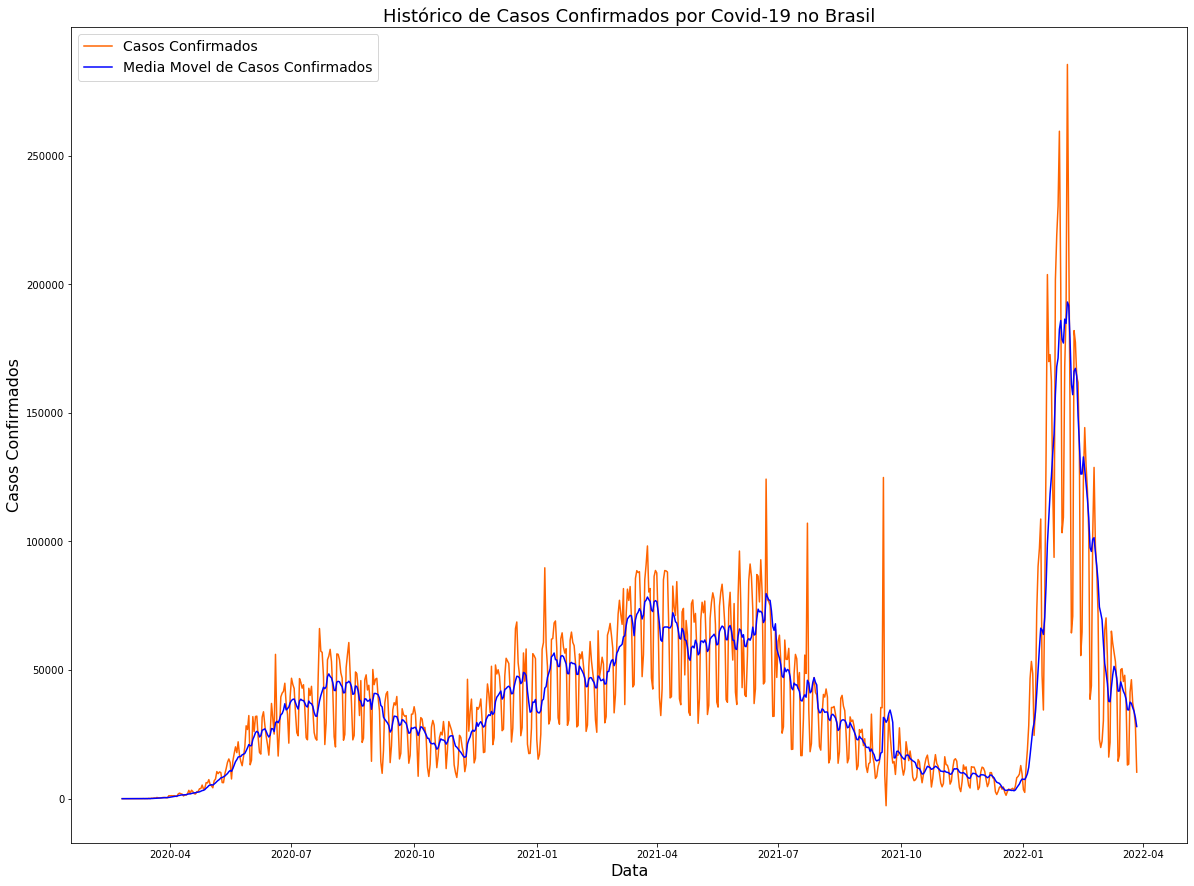

In [15]:
fig = plt.figure(figsize=(20, 15))
sns.lineplot(x=daily_evolution.index, y=daily_evolution.new_confirmed, data=daily_evolution, color="#ff6400")
sns.lineplot(x=daily_evolution.index, y=daily_evolution.moving_average_cases, data=daily_evolution, color="#0001ff")
plt.xlabel("Data", fontsize=16)
plt.ylabel("Casos Confirmados", fontsize=16)
plt.title("Histórico de Casos Confirmados por Covid-19 no Brasil", fontsize=18)
plt.legend(["Casos Confirmados", "Media Movel de Casos Confirmados"], loc="best", fontsize=14)

Text(0.5, 1.0, 'Histórico de Óbitos confirmados por covid-19 no Brasil')

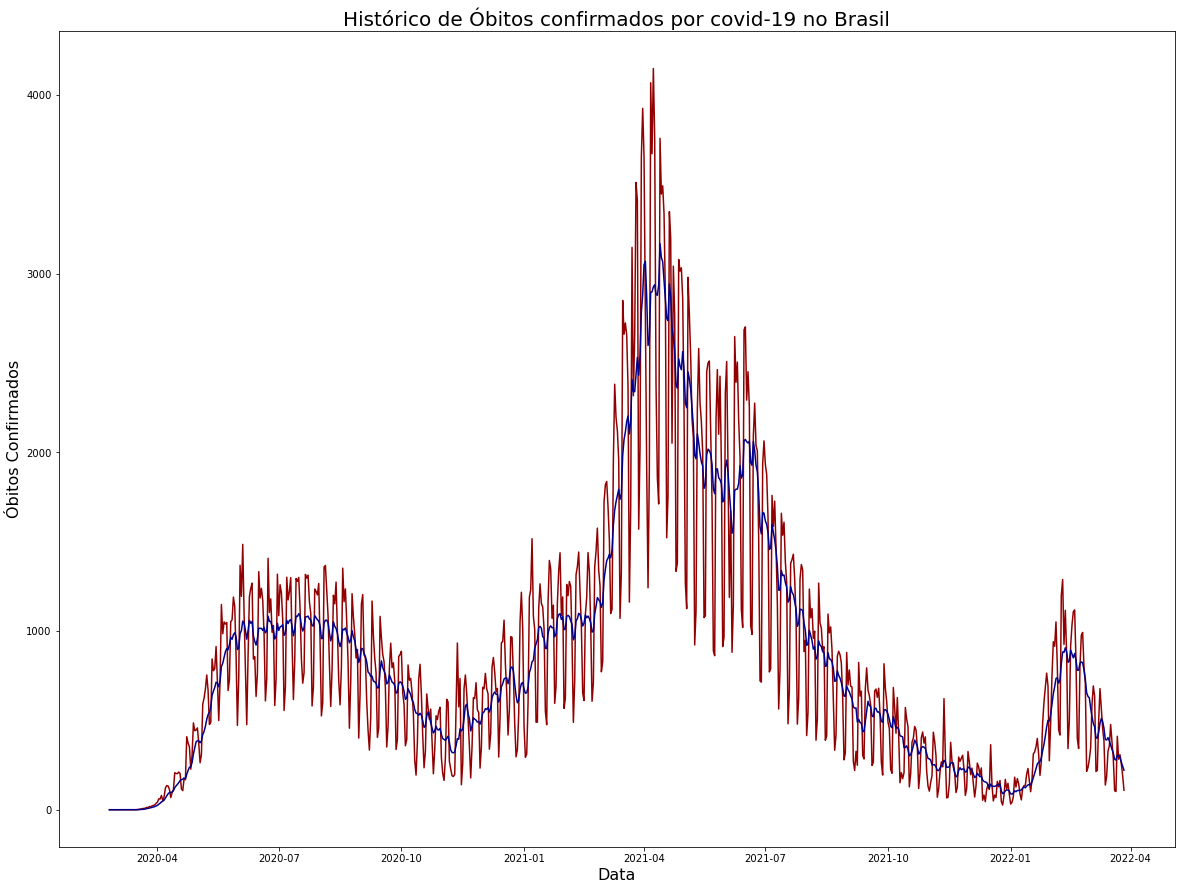

In [16]:
fig = plt.figure(figsize=(20, 15))
sns.lineplot(x=daily_evolution.index, y=daily_evolution.new_deaths, color="#920101")
sns.lineplot(x=daily_evolution.index, y=daily_evolution.moving_average_deaths, color="#00008c")
plt.xlabel("Data", fontsize=16)
plt.ylabel("Óbitos Confirmados", fontsize=16)
plt.title("Histórico de Óbitos confirmados por covid-19 no Brasil", fontsize=20)

In [17]:
states = 'states.json'
geo_json_data = json.load(open(states))

In [18]:
map_1 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

map_2 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

In [29]:
folium.Choropleth(
    geo_data = geo_json_data,
    name = 'Casos de Covid-19 por UF',
    data = cases_by_states,
    columns=[cases_by_states.index, 'new_confirmed'],
    key_on = 'feature.id',
    fill_color='OrRd',
    fill_opacity=0.8,
    legend_name = 'Casos Confirmados por UF',
    line_color='black',
    line_opacity=0.5,
    show='png').add_to(map_1)

folium.Choropleth(
    geo_data = geo_json_data,
    name = 'Obitos de Covid-19 por UF',
    data = deaths_by_states,
    columns=[deaths_by_states.index, 'new_deaths'],
    key_on = 'feature.id',
    fill_color='Reds',
    fill_opacity=0.8,
    legend_name = 'Óbitos Confirmados por UF',
    line_color='black',
    line_opacity=0.5,
    show='png').add_to(map_2)

# Niveis de Casos confirmados por Estados 

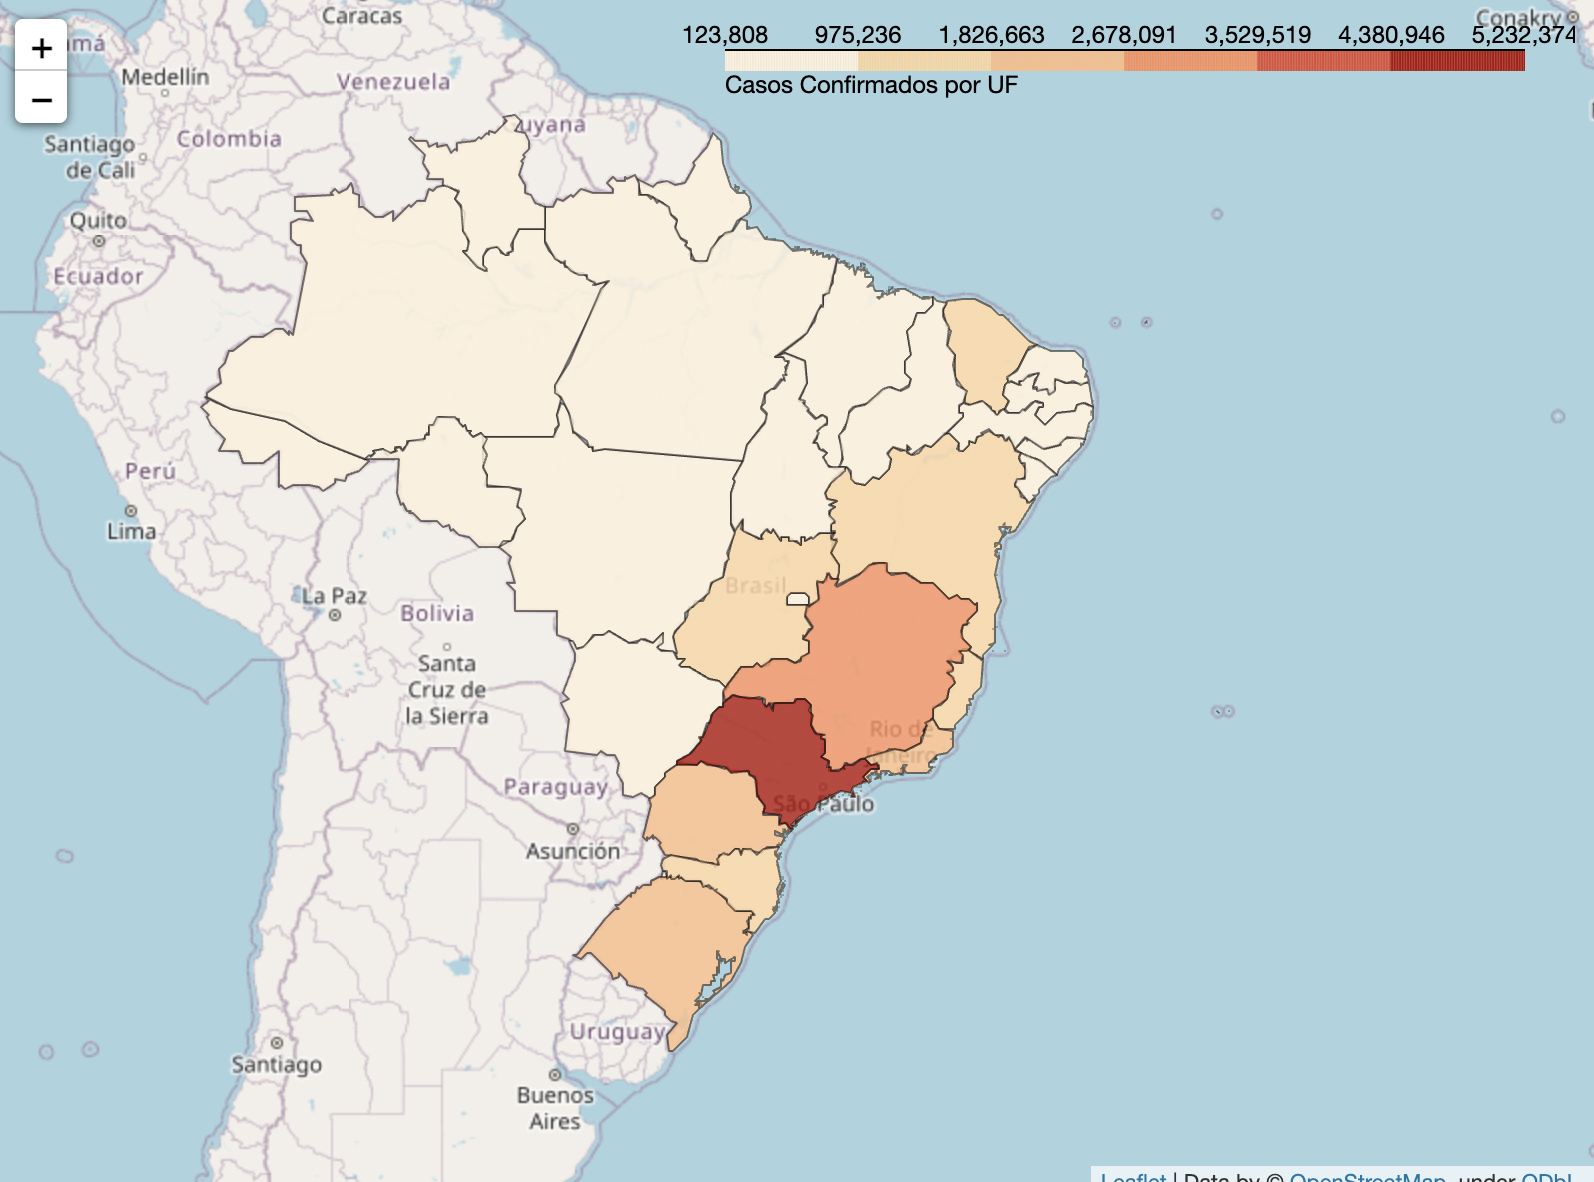

In [34]:
Image(filename="confirmed_cases.png")

# Niveis de Obitos confirmados por covid-19

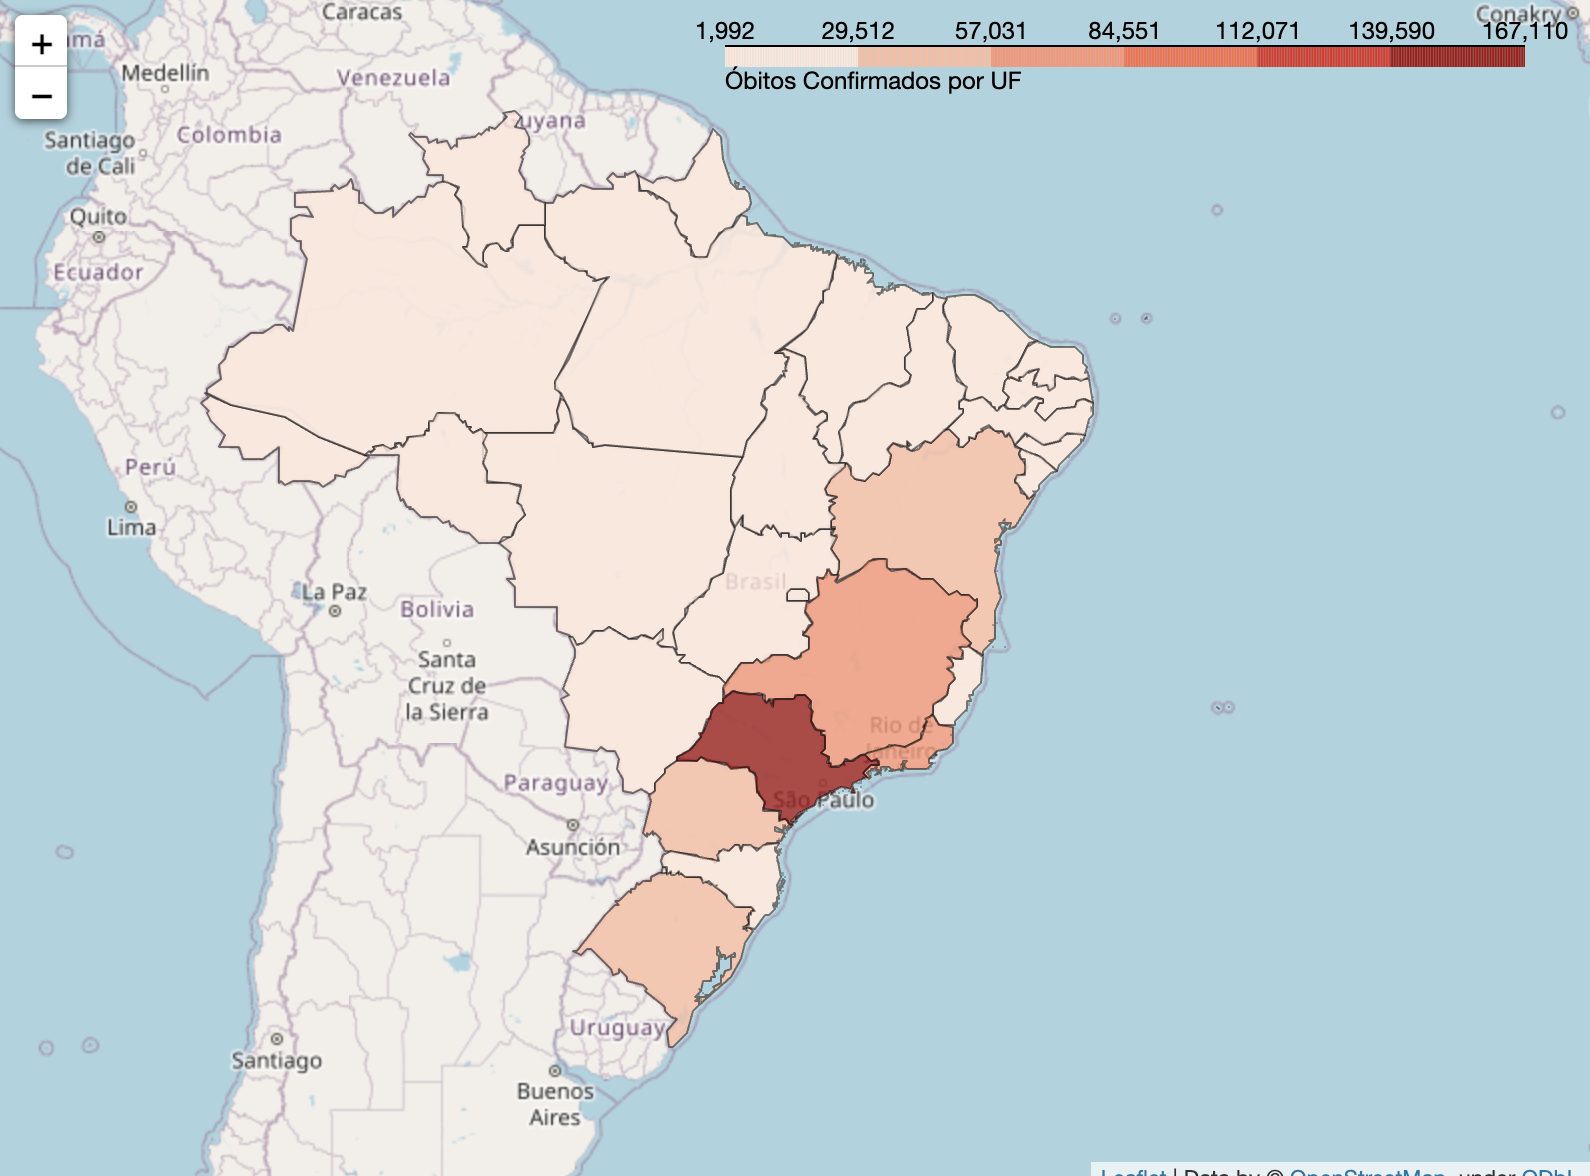

In [37]:
Image(filename="confirmed_deaths.png")